In [1]:
from FUCCIDataset import FUCCIDataset, ReferenceChannelDataset, FUCCIChannelDataset
import numpy as np
import torch
from kornia.utils import tensor_to_image
from FUCCIDataset import FUCCIDatasetInMemory, ReferenceChannelDatasetInMemory, FUCCIChannelDatasetInMemory, ChannelDatasetInMemory
from LightningModules import FUCCIDataModule
from microfilm import microplot

torch.Size([147, 2, 256, 256])
<class 'torch.Tensor'>
147
tensor(0.) tensor(4090.7500)
tensor(0.) tensor(5373.2500)
tensor(0.) tensor(4837.5000)
tensor(0.) tensor(8917.2500)
tensor(0.) tensor(1979.7500)
tensor(0.) tensor(5782.7500)
tensor(0.) tensor(8561.7500)
tensor(0.) tensor(6918.7500)
tensor(0.) tensor(7202.2500)
tensor(0.) tensor(18675.)


(array([ 3.,  3.,  0., 12.,  0.,  3.,  6.,  6., 12.,  3.,  9.,  3.,  0.,
         9.,  9.,  6.,  3.,  0.,  3.,  0.,  0.,  0.,  3.,  0.,  3.,  0.,
         3.,  3.,  0.,  3.,  6.,  0.,  0.,  0.,  3.,  0.,  0.,  0.,  6.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.,  3.,  0.,  0.,  3.,  0.,
         3.,  0.,  0.,  3.,  0.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.]),
 array([ 1119.25      ,  1690.73254395,  2262.21508789,  2833.69750977,
         3405.17993164,  3976.66259766,  4548.14501953,  5119.62744141,
         5691.10986328,  6262.59228516,  6834.07519531,  7405.55761719,
         7977.04003906,  8548.52246094,  9120.00488281,  9691.48730469,
        10262.96972656, 10834.45214844, 11405.93457031, 11977.41796875,
        12548.90039062, 13120.3828125 , 13691.86523438, 14263.34765625,
  

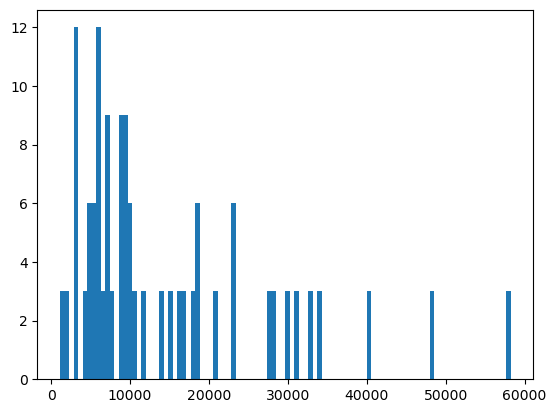

In [2]:
FUCCI_PATH = '/home/ishang/implicit-cell-model/FUCCI-dev-data'
# FUCCI_PATH = '/data/ishang/Fucci-dataset-v3_filtered/'
# ds_og = ReferenceChannelDataset(FUCCI_PATH, imsize=256)
# ds = ReferenceChannelDatasetInMemory(FUCCI_PATH, imsize=256)
ds = FUCCIChannelDatasetInMemory(FUCCI_PATH, imsize=256)
print(ds.dataset_images.shape)
ds[0].shape
ds[20].shape
print(type(ds[0]))
print(len(ds))
# print(type(ds_og[0]))
# print(len(ds_og))
for i in range(10):
    print(ds[i].min(), ds[i].max())

# plot histogram of image max intensities
import matplotlib.pyplot as plt
plt.hist([ds[i].max() for i in range(len(ds))], bins=100)

['CDT1']
torch.Size([256, 256])


/home/ishang/miniconda3/envs/implicit/lib/python3.10/site-packages/microfilm/microplot.py:164: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  microim.fig = plt.figure(frameon=False, dpi=microim.dpi)


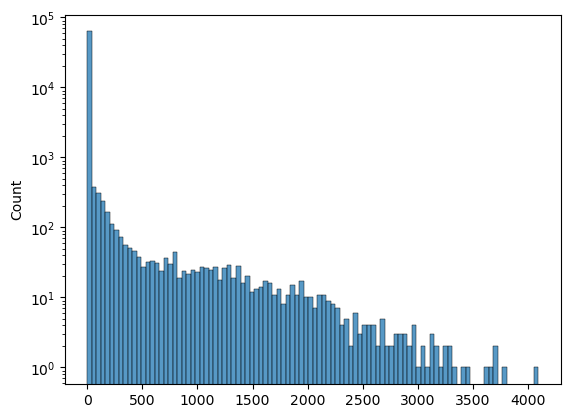

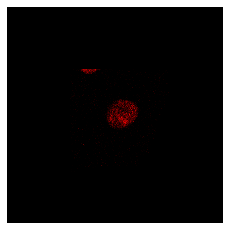

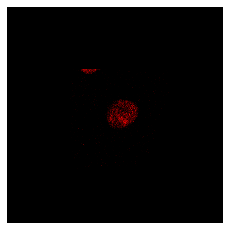

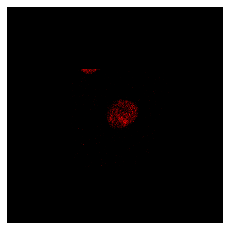

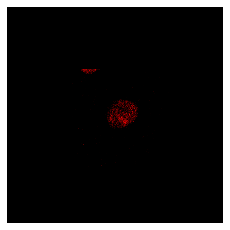

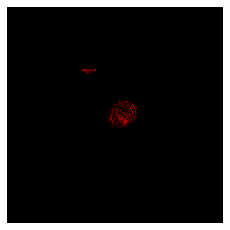

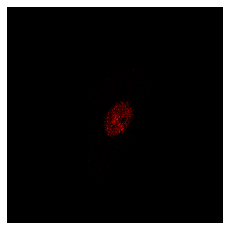

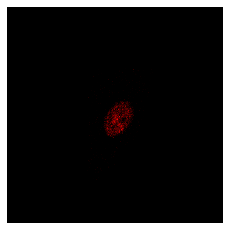

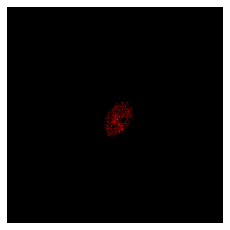

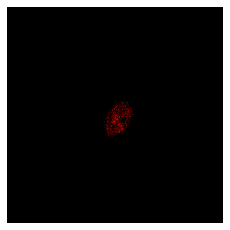

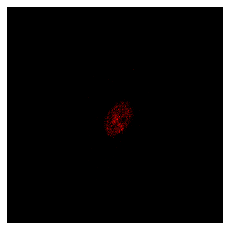

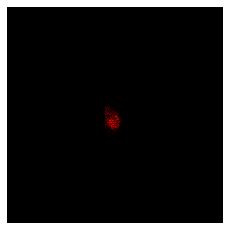

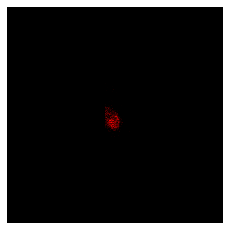

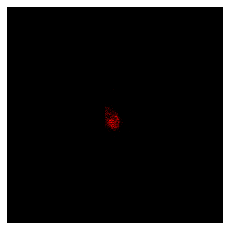

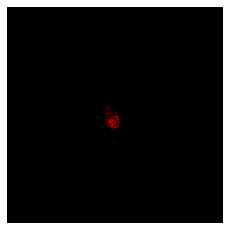

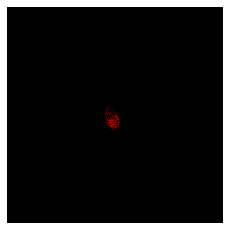

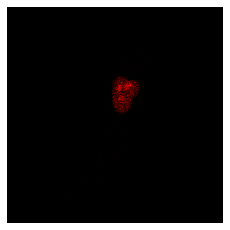

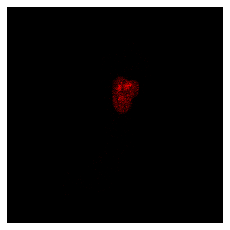

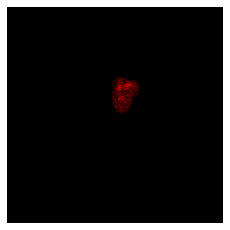

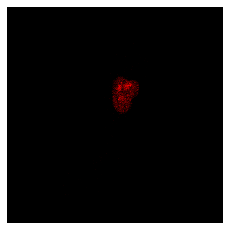

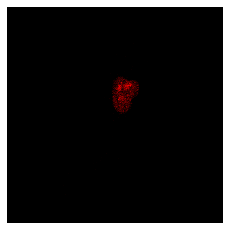

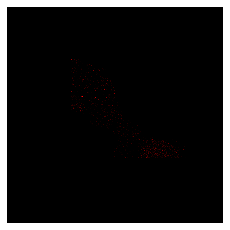

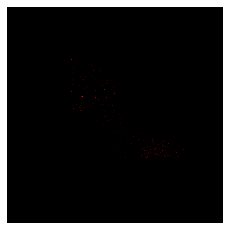

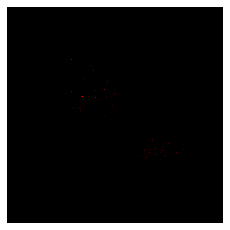

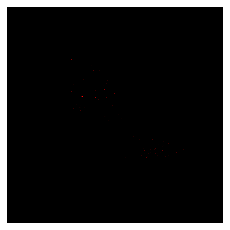

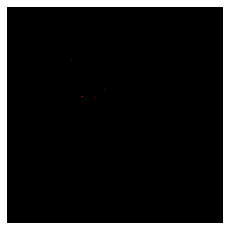

In [21]:
FUCCI_PATH = '/home/ishang/implicit-cell-model/FUCCI-dev-data'
ds = ChannelDatasetInMemory(data_dir=FUCCI_PATH, channel_slice=[3], imsize=256)
from FUCCIDataset import GemininDatasetInMemory, CDT1DatasetInMemory
ds_g = GemininDatasetInMemory(data_dir=FUCCI_PATH, imsize=256)
ds_c = CDT1DatasetInMemory(data_dir=FUCCI_PATH, imsize=256)
print(ds.get_channel_names())
data_batch = next(iter(ds))
print(data_batch[0].shape)
import seaborn as sns
sns.histplot(data_batch[0].flatten().numpy(), bins=100)
plt.yscale('log')
for i in range(5):
    img = np.moveaxis(tensor_to_image(ds[i]), -1, 0)
    img_g = np.moveaxis(tensor_to_image(ds_g[i]), -1, 0)
    img_c = np.moveaxis(tensor_to_image(ds_c[i]), -1, 0)
    for min_val in range(0, 500, 100):
        microplot.microshow(images=img.clip(min_val), cmaps=ds.channel_colors())
        microplot.microshow(images=img_g, cmaps=ds_g.channel_colors())
        microplot.microshow(images=img_c, cmaps=ds_c.channel_colors())

In [5]:
# ct = 0
# for i in range(len(ds_og)):
#     # print(ds[i].shape, ds_og[i].shape)
#     if not torch.allclose(ds[i], ds_og[i]):
#         print(i)
#         ct += 1
# print(ct)

torch.Size([2, 256, 256]) torch.Size([2, 256, 256])
torch.Size([2, 256, 256]) torch.Size([2, 256, 256])
torch.Size([2, 256, 256]) torch.Size([2, 256, 256])
torch.Size([2, 256, 256]) torch.Size([2, 256, 256])
torch.Size([2, 256, 256]) torch.Size([2, 256, 256])
torch.Size([2, 256, 256]) torch.Size([2, 256, 256])
torch.Size([2, 256, 256]) torch.Size([2, 256, 256])
torch.Size([2, 256, 256]) torch.Size([2, 256, 256])
torch.Size([2, 256, 256]) torch.Size([2, 256, 256])
torch.Size([2, 256, 256]) torch.Size([2, 256, 256])
torch.Size([2, 256, 256]) torch.Size([2, 256, 256])
torch.Size([2, 256, 256]) torch.Size([2, 256, 256])
torch.Size([2, 256, 256]) torch.Size([2, 256, 256])
torch.Size([2, 256, 256]) torch.Size([2, 256, 256])
torch.Size([2, 256, 256]) torch.Size([2, 256, 256])
torch.Size([2, 256, 256]) torch.Size([2, 256, 256])
torch.Size([2, 256, 256]) torch.Size([2, 256, 256])


In [ ]:
print(len(ds))

147


In [ ]:
dm = FUCCIDataModule(data_dir=FUCCI_PATH, dataset="reference", batch_size=16, num_workers=32, imsize=1024)
dm_small = FUCCIDataModule(data_dir=FUCCI_PATH, dataset="reference", batch_size=16, num_workers=32, imsize=256)
train_data = dm.train_dataloader()
data_batch = next(iter(train_data))
data_batch_small = next(iter(dm_small.train_dataloader()))

(2, 256, 256)


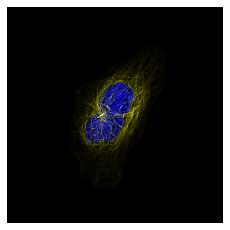

In [ ]:
torch.max(data_batch[0, 1, :, :])
cmap = ['pure_blue', 'pure_yellow', 'pure_green', 'pure_red']
img = np.moveaxis(tensor_to_image(data_batch[0]), -1, 0)
print(img.shape)
microplot.microshow(images=img, cmaps=cmap[:2])

(2, 256, 256)
(2, 256, 256)


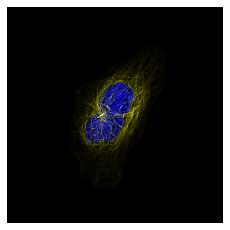

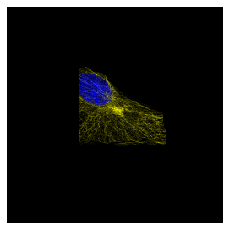

In [ ]:
img_small = np.moveaxis(tensor_to_image(data_batch_small[0]), -1, 0)
img_1024 = microplot.microshow(images=img, cmaps=cmap[:2])
img_256 = microplot.microshow(images=img_small, cmaps=cmap[:2])
img_1024.savefig("sample_ref_1024.png")
img_256.savefig("sample_ref_256.png")
print(img.shape)
print(img_small.shape)

In [ ]:
# import imageio as iio

# iio.imwrite("sample_ref_nuclei_256.png", img_small[0])
# iio.imwrite("sample_ref_microtubule_256.png", img_small[1])
# iio.imwrite("sample_ref_nuclei_1024.png", img[0])
# iio.imwrite("sample_ref_microtubule_1024.png", img[1])

from PIL import Image
Image.fromarray(img_small[0]).convert("I").save("sample_ref_nuclei_256.png")
Image.fromarray(img_small[1]).convert("I").save("sample_ref_microtubule_256.png")
Image.fromarray(img[0]).convert("I").save("sample_ref_nuclei_1024.png")
Image.fromarray(img[1]).convert("I").save("sample_ref_microtubule_1024.png")